# Simple Regression

### Problem Statement: Predict Salary based on Experience
### Simple Regression: h(X) = theta0+theta1(X)

## Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import Dataset

In [3]:
dataset = pd.read_csv('Data/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(dataset)

print(X) # years of experience
print(y) # Salary

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2

## Analyzing Dataset

In [4]:
print("Dataset Shape: ",dataset.shape)
print("Dataset Describe: ",dataset.describe())

Dataset Shape:  (30, 2)
Dataset Describe:         YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


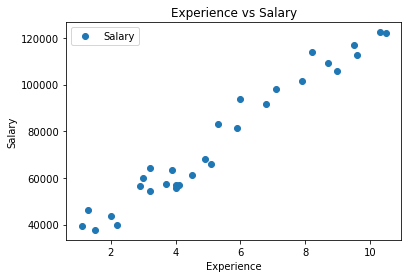

In [5]:
dataset.plot(x='YearsExperience', y='Salary', style='o')
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

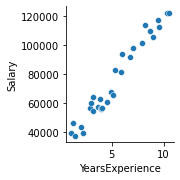

In [6]:
sns.pairplot(dataset, x_vars='YearsExperience', y_vars='Salary')
plt.show()

## Splitting Dataset - Training & Testing Dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#print(X_train)
#print(type(X_train))
#print(X_train.ndim)

## Train Simple Regression on Training Dataset

### Additional Info

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
print(" \nThe value of Coefficients a0 and a1:  \n",regressor.intercept_,regressor.coef_ )

 
The value of Coefficients a0 and a1:  
 26816.19224403119 [9345.94244312]


## Predict Testing Dataset Result

In [10]:
y_pred = regressor.predict(X_test)

print("Actual_Value\tPredicted_value\tDifference")

for x, y in zip(y_test, y_pred):
    #print(x, y, sep='\t\t')
    print('{:0.2f}\t{:0.2f}\t{:0.2f}'.format(x, y,x-y))

Actual_Value	Predicted_value	Difference
37731.00	40835.11	-3104.11
122391.00	123079.40	-688.40
57081.00	65134.56	-8053.56
63218.00	63265.37	-47.37
116969.00	115602.65	1366.35
109431.00	108125.89	1305.11
112635.00	116537.24	-3902.24
55794.00	64199.96	-8405.96
83088.00	76349.69	6738.31
101302.00	100649.14	652.86


## Visualising the Training set results

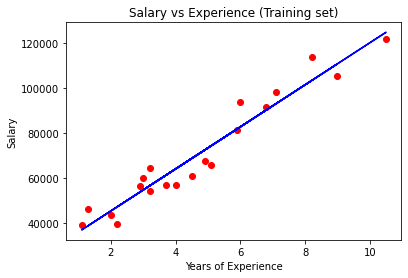

In [11]:
#plotting data points for dataset
plt.scatter(X_train, y_train, color = 'red')

#plotting prediction line on Training dataset
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

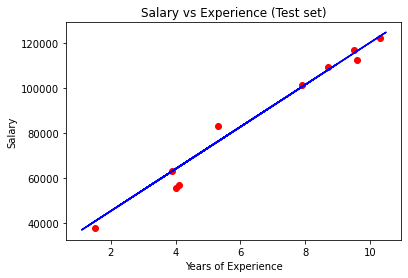

In [12]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Displaying Actual Data and Predicted values

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


## Checking Accuracy

In [14]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

accuracy = regressor.score(X_test,y_test)
print("Accuracy:",accuracy*100,'%')

Mean Absolute Error: 3426.4269374307123
Mean Squared Error: 21026037.329511296
Root Mean Squared Error: 4585.4157204675885
Accuracy: 97.49154407708353 %


In [15]:
score_value_train = regressor.score(X_train, y_train)
score_value_test = regressor.score(X_test, y_test)

print(" \nScore Values")
print("Training Score: ",score_value_train)
print("Testing Score: ",score_value_test)

 
Score Values
Training Score:  0.9381900012894278
Testing Score:  0.9749154407708353


In [16]:
experience_val = float(input("Enter the Experience (years):"))

Enter the Experience (years):6


In [17]:
# The value of Coefficients a0 and a1:  26816.19224403119 [9345.94244312]
# Manual Prediction:
# manual_predicted_salary = 26816.19224403119 + 9345.94244312*experience_val
manual_predicted_salary = regressor.intercept_ + regressor.coef_ * experience_val
print("Predicated Salary for Experience (Manually):",experience_val," = ",manual_predicted_salary )


# Regressor Prediction: 
predicted_salary = regressor.predict([[experience_val]])
print("Predicated Salary for Experience (Regressor):",experience_val," = ",predicted_salary )

Predicated Salary for Experience (Manually): 6.0  =  [82891.84690277]
Predicated Salary for Experience (Regressor): 6.0  =  [82891.84690277]
